In [5]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np


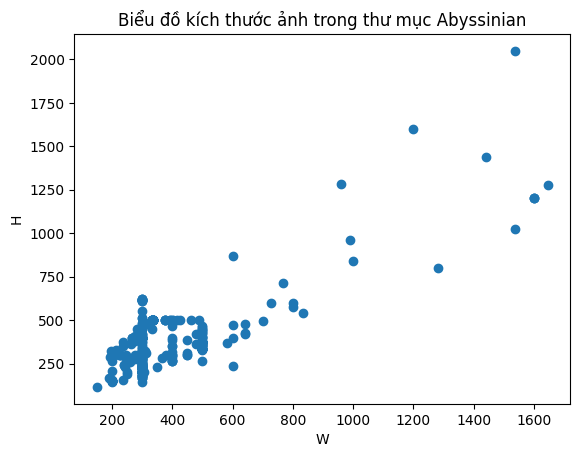

Thư mục Abyssinian: W trung bình = 383.16285714285715, H trung bình = 376.39142857142855


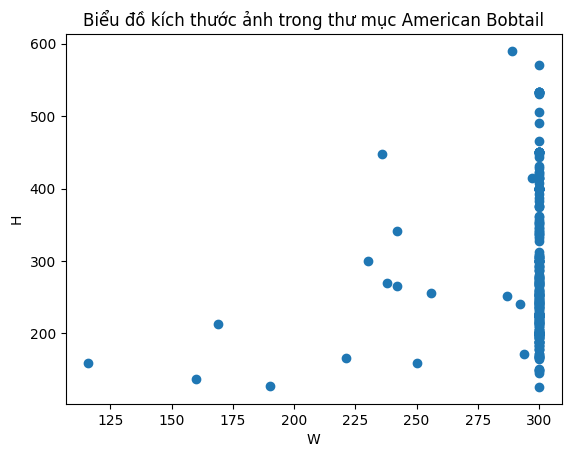

Thư mục American Bobtail: W trung bình = 296.8828571428571, H trung bình = 268.91714285714284


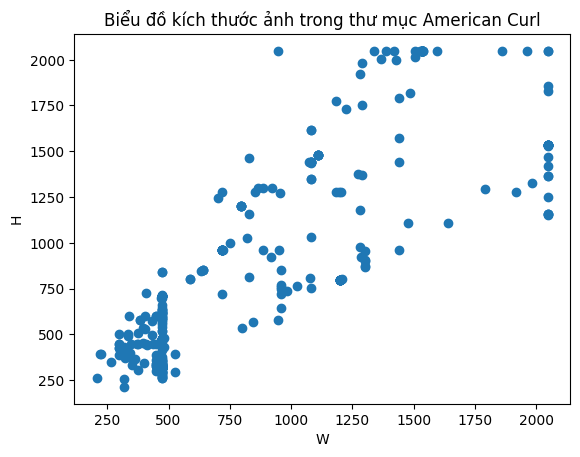

Thư mục American Curl: W trung bình = 898.1514285714286, H trung bình = 966.4485714285714


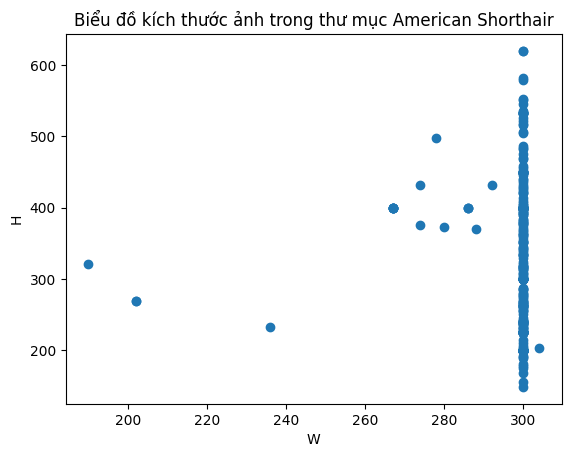

Thư mục American Shorthair: W trung bình = 297.9428571428571, H trung bình = 328.5314285714286


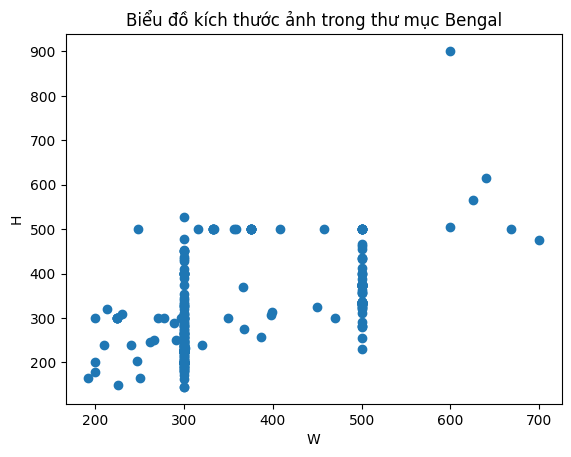

Thư mục Bengal: W trung bình = 370.2, H trung bình = 310.4685714285714


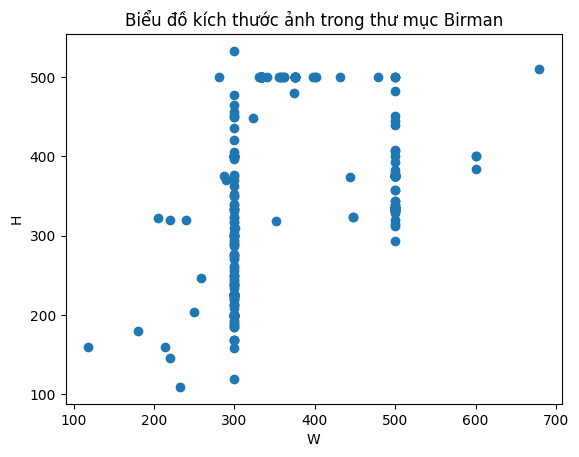

Thư mục Birman: W trung bình = 393.8142857142857, H trung bình = 338.0914285714286


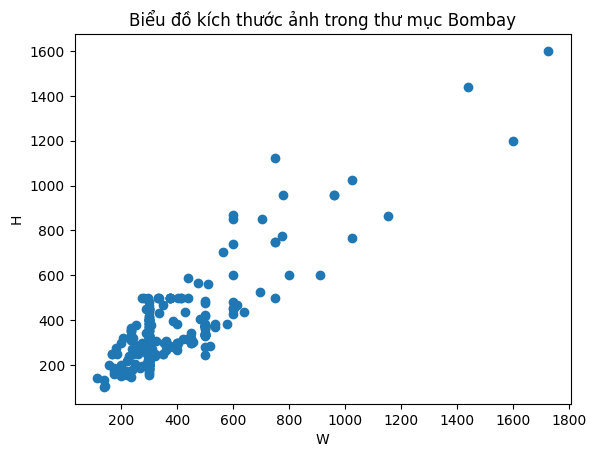

Thư mục Bombay: W trung bình = 375.1514285714286, H trung bình = 341.0542857142857


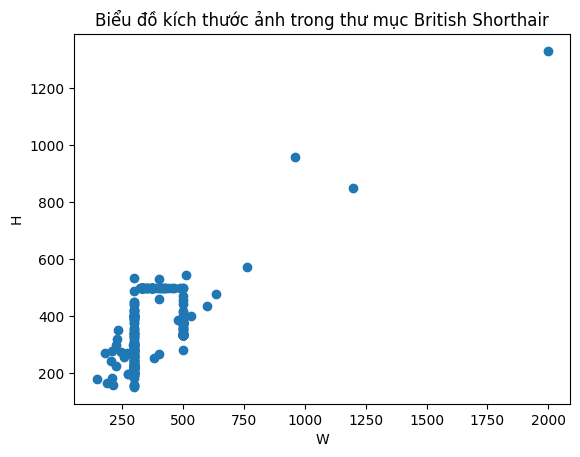

Thư mục British Shorthair: W trung bình = 389.0542857142857, H trung bình = 353.5657142857143


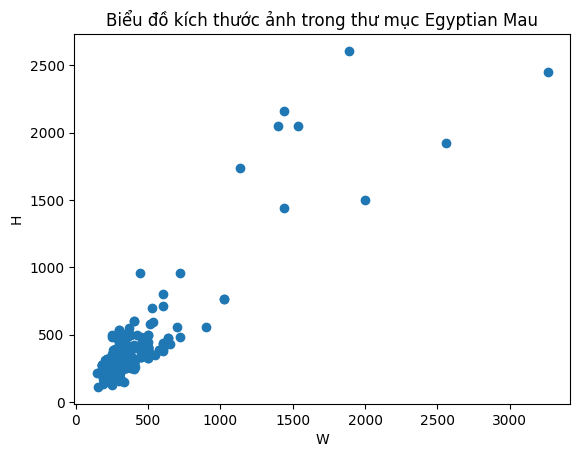

Thư mục Egyptian Mau: W trung bình = 380.07714285714286, H trung bình = 353.1514285714286


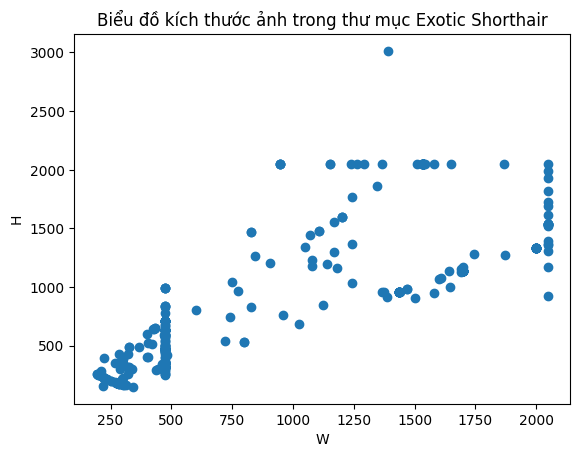

Thư mục Exotic Shorthair: W trung bình = 901.9028571428571, H trung bình = 883.4571428571429


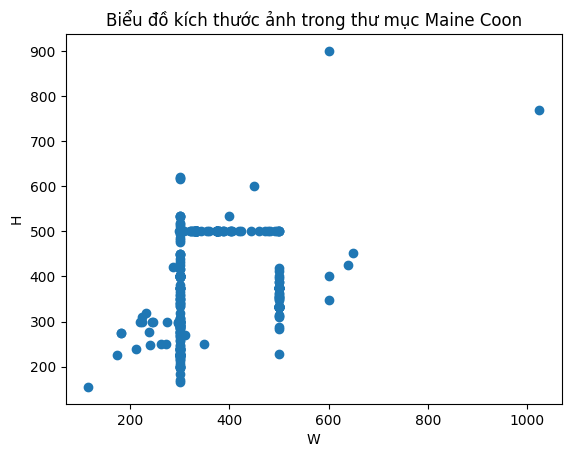

Thư mục Maine Coon: W trung bình = 369.1257142857143, H trung bình = 373.62


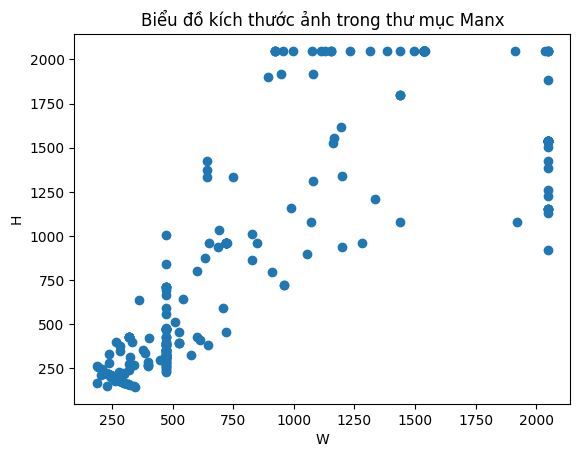

Thư mục Manx: W trung bình = 874.7971428571428, H trung bình = 936.64


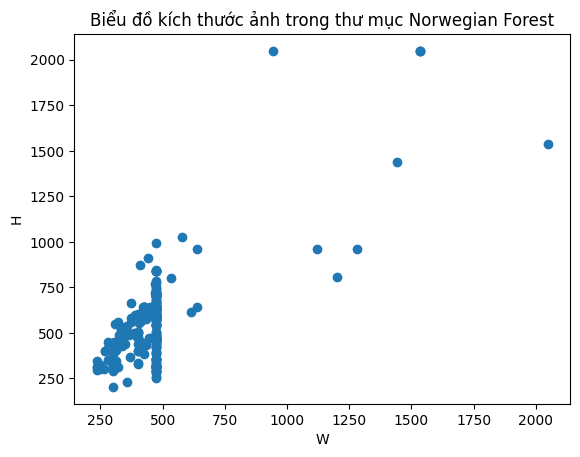

Thư mục Norwegian Forest: W trung bình = 464.0542857142857, H trung bình = 571.3971428571429


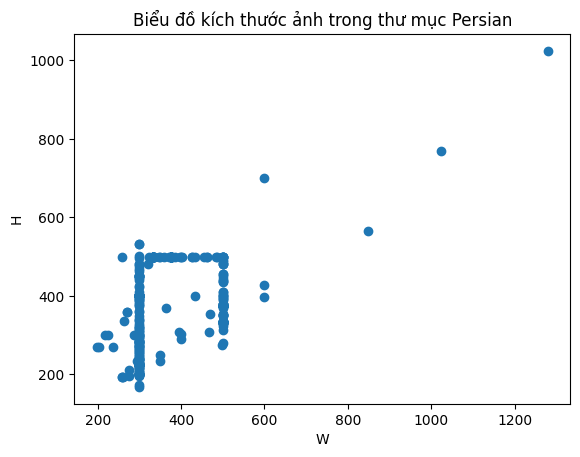

Thư mục Persian: W trung bình = 383.57142857142856, H trung bình = 367.50857142857143


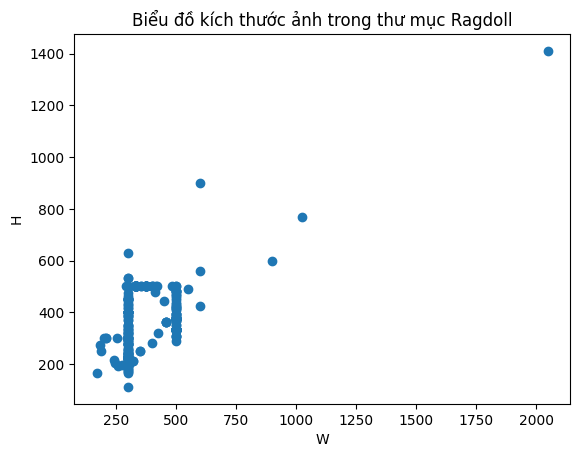

Thư mục Ragdoll: W trung bình = 387.46, H trung bình = 352.50857142857143


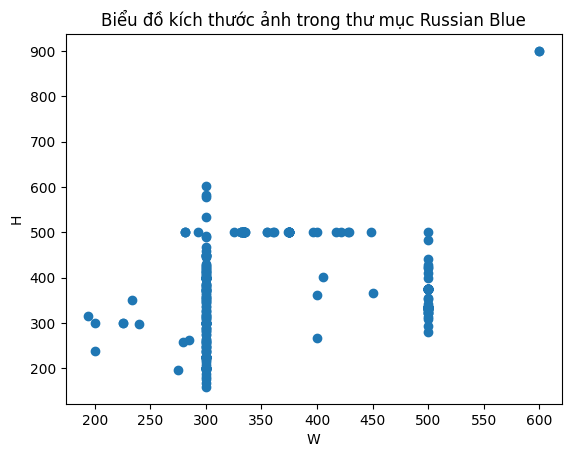

Thư mục Russian Blue: W trung bình = 376.33714285714285, H trung bình = 364.2085714285714


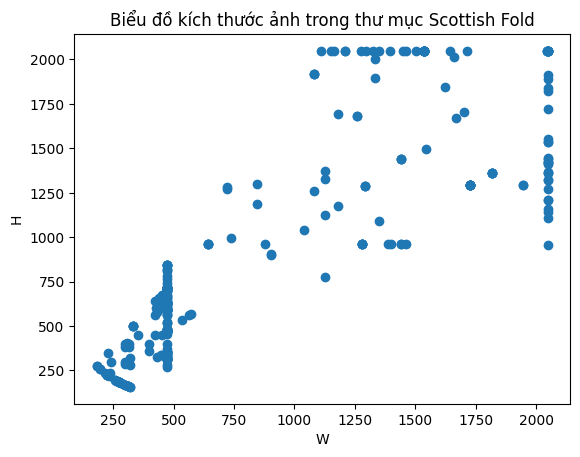

Thư mục Scottish Fold: W trung bình = 843.84, H trung bình = 877.3257142857143


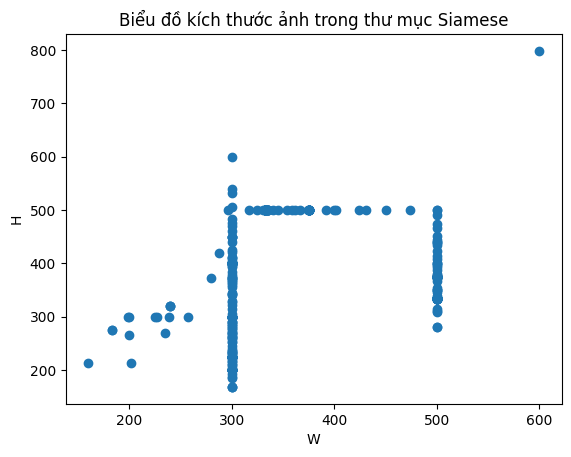

Thư mục Siamese: W trung bình = 373.7342857142857, H trung bình = 358.12285714285713


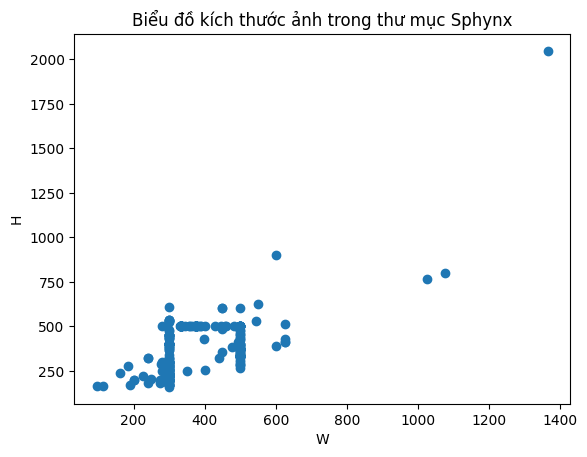

Thư mục Sphynx: W trung bình = 379.1171428571429, H trung bình = 371.2342857142857


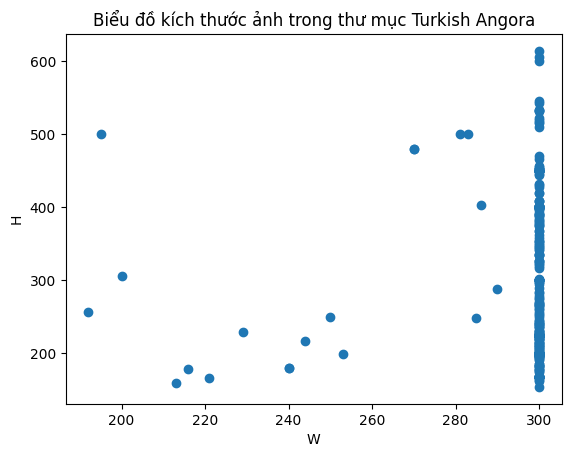

Thư mục Turkish Angora: W trung bình = 297.02285714285716, H trung bình = 288.01428571428573


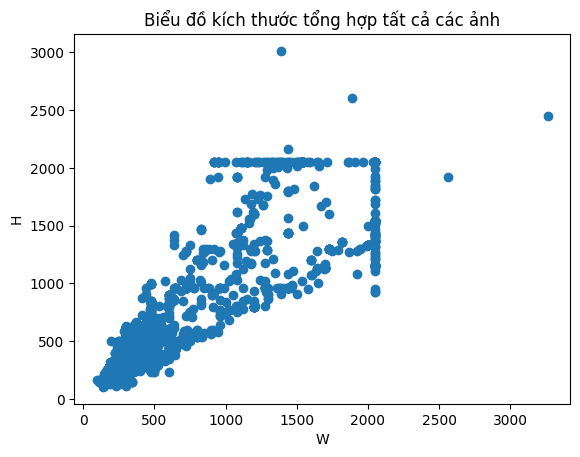

Tổng hợp: W trung bình = 471.77, H trung bình = 469.03285714285715


In [6]:

# main_dir = "CatBreedsRefined-v2_OutputCutter" # Đường dẫn đến thư mục chính
main_dir = "C:\\Users\\duc18\\@MyData\\@Python\\CatBreedsRefined-7K\\CatBreedsRefined-v2"
# main_dir = "C:\\Users\\duc18\\@MyData\\@Python\\CatBreedsRefined-7K\\CatBreedsRefined-v2_OutputCutter"
sub_dirs = [d for d in os.listdir(main_dir) if os.path.isdir(os.path.join(main_dir, d))] # Lấy danh sách tất cả các thư mục con

all_images_sizes = [] # Khởi tạo list để lưu trữ kích thước của tất cả các ảnh

for i, sub_dir in enumerate(sub_dirs): # Duyệt qua từng thư mục con
    # Lấy danh sách tất cả các ảnh trong thư mục con
    images = [f for f in os.listdir(os.path.join(main_dir, sub_dir)) if os.path.isfile(os.path.join(main_dir, sub_dir, f))]
    sub_dir_images_sizes = [] # list lưu trữ kích thước của các ảnh trong thư mục con
    for image in images: # ảnh
        img = cv2.imread(os.path.join(main_dir, sub_dir, image))
        h, w, d = img.shape
        if d > 3: # Nếu ảnh có nhiều hơn 3 kênh màu thì cắt giảm các kênh từ thứ 4 trở đi
            img = img[:, :, :3]
            d = 3
        # Thêm kích thước của ảnh
        sub_dir_images_sizes.append((w, h))
        all_images_sizes.append((w, h))
    
    # Vẽ biểu đồ điểm cho kích thước của các ảnh trong thư mục con
    plt.figure(i)
    plt.scatter(*zip(*sub_dir_images_sizes))
    plt.xlabel('W')
    plt.ylabel('H')
    plt.title(f'Biểu đồ kích thước ảnh trong thư mục {sub_dir}')
    plt.show()
    
    # Tính và in ra giá trị trung bình cho chiều rộng và chiều cao
    avg_w, avg_h = np.mean(sub_dir_images_sizes, axis=0)
    print(f'Thư mục {sub_dir}: W trung bình = {avg_w}, H trung bình = {avg_h}')

# Vẽ biểu đồ lớn tổng hợp tất cả các ảnh từ 20 thư mục con
plt.figure(len(sub_dirs) + 1)
plt.scatter(*zip(*all_images_sizes))
plt.xlabel('W')
plt.ylabel('H')
plt.title('Biểu đồ kích thước tổng hợp tất cả các ảnh')
plt.show()

# Tính và in ra giá trị trung bình cho chiều rộng và chiều cao
avg_w, avg_h = np.mean(all_images_sizes, axis=0)
print(f'Tổng hợp: W trung bình = {avg_w}, H trung bình = {avg_h}')


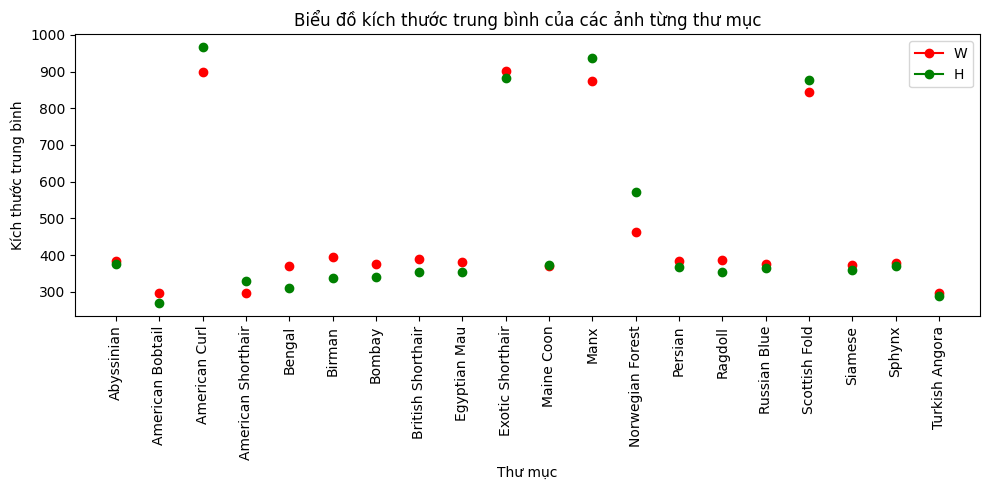

In [7]:
# Khởi tạo list để lưu trữ kích thước trung bình của các ảnh
avg_sizes = []

# Duyệt qua từng thư mục con
for i, sub_dir in enumerate(sub_dirs):
    # Lấy danh sách tất cả các ảnh trong thư mục con
    images = [f for f in os.listdir(os.path.join(main_dir, sub_dir)) if os.path.isfile(os.path.join(main_dir, sub_dir, f))]
    
    # Khởi tạo list để lưu trữ kích thước của các ảnh trong thư mục con
    sub_dir_images_sizes = []
    
    # Duyệt qua từng ảnh
    for image in images:
        # Đọc ảnh
        img = cv2.imread(os.path.join(main_dir, sub_dir, image))
        
        # Lấy kích thước của ảnh
        h, w, d = img.shape
        
        # Nếu ảnh có nhiều hơn 3 kênh màu thì cắt giảm các kênh từ thứ 4 trở đi
        if d > 3:
            img = img[:, :, :3]
            d = 3
        
        # Thêm kích thước của ảnh vào list
        sub_dir_images_sizes.append((w, h))
    
    # Tính giá trị trung bình cho chiều rộng và chiều cao
    avg_w, avg_h = np.mean(sub_dir_images_sizes, axis=0)
    
    # Thêm kích thước trung bình vào list
    avg_sizes.append((sub_dir, avg_w, avg_h))

# Vẽ biểu đồ đường cho kích thước trung bình của các ảnh từng thư mục
plt.figure(figsize=(10, 5))
for sub_dir, avg_w, avg_h in avg_sizes:
    plt.plot(sub_dir, avg_w, color='red', marker='o')
    plt.plot(sub_dir, avg_h, color='green', marker='o')
plt.xlabel('Thư mục')
plt.ylabel('Kích thước trung bình')
plt.title('Biểu đồ kích thước trung bình của các ảnh từng thư mục')
plt.legend(['W', 'H'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
